## CNN Model Training for Binary Image Classification

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories for your dataset
train_dir = 'data/train'
validation_dir = 'data/val'
test_dir = 'data/test'

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data augmentation for training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test datasets do not need augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generators for loading data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


Found 254 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
Epoch 1/50
7/7 [==============================] - 6s 674ms/step - loss: 0.7568 - accuracy: 0.5360 - val_loss: 0.6861 - val_accuracy: 0.5156
Epoch 2/50
7/7 [==============================] - 4s 622ms/step - loss: 0.6941 - accuracy: 0.4955 - val_loss: 0.6867 - val_accuracy: 0.6094
Epoch 3/50
7/7 [==============================] - 4s 592ms/step - loss: 0.6856 - accuracy: 0.6071 - val_loss: 0.6513 - val_accuracy: 0.5625
Epoch 4/50
7/7 [==============================] - 4s 595ms/step - loss: 0.6890 - accuracy: 0.5631 - val_loss: 0.6549 - val_accuracy: 0.6719
Epoch 5/50
7/7 [==============================] - 4s 594ms/step - loss: 0.6535 - accuracy: 0.6757 - val_loss: 0.6315 - val_accuracy: 0.6250
Epoch 6/50
7/7 [==============================] - 4s 583ms/step - loss: 0.6400 - accuracy: 0.6351 - val_loss: 0.6602 - val_accuracy: 0.7031
Epoch 7/50
7/7 [=======================

## CNN Architecture

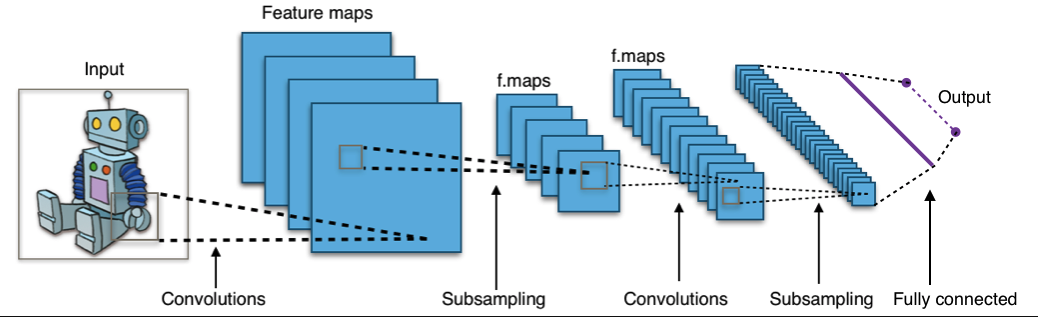

In [9]:
from PIL import Image
from IPython.display import display

def print_image(image_path):
    try:
        img = Image.open(image_path)

        display(img)
        

    except Exception as e:
        print("Error:", e)

image_path = "typical_cnn.png"  # Change this to your image file's path

# Call the function to display the image
print_image(image_path)


## CNN + VGG16 (Transfer learning) for Binary Classification

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories for your dataset
train_dir = 'data/train'
validation_dir = 'data/val'
test_dir = 'data/test'

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data Augmentation and Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Model Architecture with Transfer Learning (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Freeze the base model layers
base_model.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy


Found 254 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
Found 79 images belonging to 2 classes.


Epoch 1/50
7/7 [==============================] - 14s 2s/step - loss: 1.2712 - accuracy: 0.5901 - val_loss: 0.4843 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 2/50
7/7 [==============================] - 13s 2s/step - loss: 0.6654 - accuracy: 0.6429 - val_loss: 0.4044 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 3/50
7/7 [==============================] - 13s 2s/step - loss: 0.5967 - accuracy: 0.7432 - val_loss: 0.4081 - val_accuracy: 0.8281 - lr: 0.0010
Epoch 4/50
7/7 [==============================] - 13s 2s/step - loss: 0.5498 - accuracy: 0.7297 - val_loss: 0.3888 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 5/50
7/7 [==============================] - 15s 2s/step - loss: 0.4859 - accuracy: 0.7613 - val_loss: 0.3474 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/50
7/7 [==============================] - 13s 2s/step - loss: 0.4804 - accuracy: 0.7793 - val_loss: 0.3288 - val_accuracy: 0.8906 - lr: 0.0010
Epoch 7/50
7/7 [==============================] - 13s 2s/step - loss: 0.4388 - accuracy: 0.806

In [ ]:
from tensorflow.keras.models import load_model, save_model

# Save the trained model
model.save('model.h5')

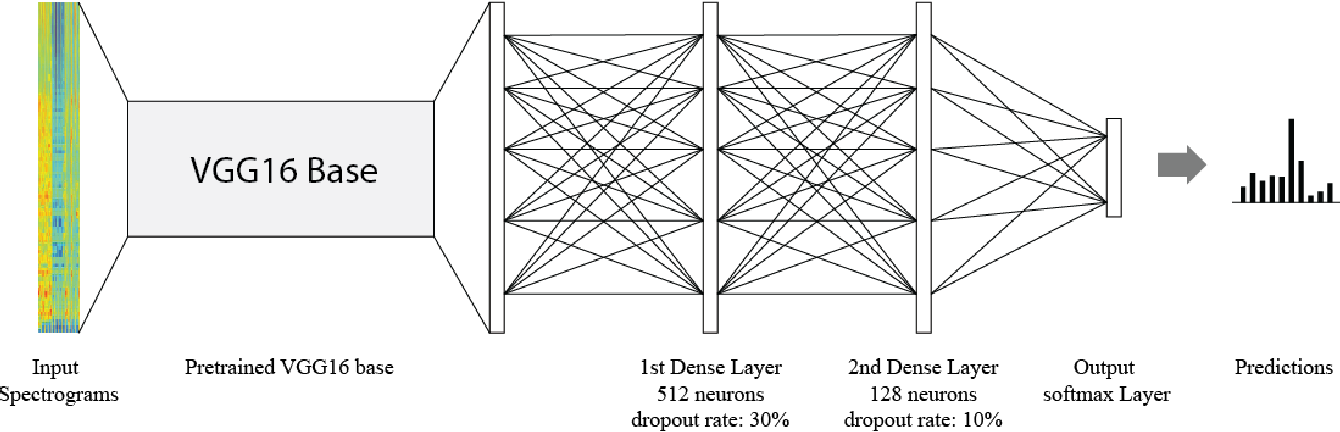

In [10]:
from PIL import Image
from IPython.display import display

def print_image(image_path):
    try:
        img = Image.open(image_path)
        display(img)
        
    except Exception as e:
        print("Error:", e)
image_path = "vgg.png"  

print_image(image_path)


In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an image for prediction
image_path = 'data/test/bees/10870992_eebeeb3a12.jpg'
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  

# Normalize the image
img_array /= 255.

# Make prediction
prediction = model.predict(img_array)

# Classify the prediction
if prediction < 0.5:
    print("The image contains an ant.")
else:
    print("The image contains a bee.")


1/1 [==============================] - 0s 400ms/step
The image contains a bee.
